# Construction d'un Modèle KNN
K-Nearest Neighbors (KNN) est un type d'apprentissage supervisé qui peut être utilisé pour la classification et la régression. KNN fonctionne en trouvant les 'K' échantillons les plus proches dans l'ensemble de données d'apprentissage d'un nouvel échantillon non classé. L'échantillon non classé est ensuite classé basé sur la majorité des classes des 'K' échantillons les plus proches.


## Étape 1: Choisir le nombre K de voisins
La première étape de l'utilisation de l'algorithme KNN est de choisir le nombre 'K' de voisins. Il s'agit du nombre de voisins que nous examinerons pour déterminer la classification d'un point de données non classé.

## Étape 2: Calculer les distances euclidiennes
Après avoir choisi un 'K', calculez la distance entre le point de données à classer et les autres points de données. La distance euclidienne est généralement utilisée pour cela, mais d'autres mesures de distance comme la distance de Manhattan peuvent aussi être utilisées.

## Étape 3: Trouver les K voisins les plus proches
Trouver les 'K' points de données dans notre ensemble de données d'entraînement qui sont les plus proches du point de données que nous essayons de classer.

## Étape 4: Voter pour la classe majoritaire
Une fois que nous avons identifié les 'K' voisins les plus proches, nous les utilisons pour voter pour la classe du point de données non classé. Le point de données non classé est généralement attribué à la classe qui a le plus de voisins parmi les 'K' voisins les plus proches.

## Étape 5: Classer le point de données non classé
En fonction du vote majoritaire des 'K' voisins, nous classons le point de données non classé.

Répétez les étapes 2 à 5 pour chaque point de données non classé dans l'ensemble de test.

Note : L'algorithme KNN est un algorithme "paresseux" ce qui signifie qu'il ne construit pas un modèle utilisant l'ensemble d'apprentissage avant de faire des prédictions. Il fait des calculs au moment de faire des prédictions. Il peut donc être coûteux en temps et en ressources pour les grands ensembles de données.


# Importation des packages et chargement des données

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# Chargement du jeu de données Iris
iris = load_iris()
X = iris.data  # Caractéristiques
y = iris.target  # Étiquettes

# KNN Pour la classification

In [3]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des valeurs de k à tester
k_values = list(range(1, 30))


In [4]:
# Création de l'instance du classificateur KNN
knn = KNeighborsClassifier()
# Paramètres pour la recherche de grille
param_grid = {'n_neighbors': k_values}

# Recherche de grille avec validation croisée
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Extraction des scores de validation croisée et des valeurs de k correspondantes
cv_scores = grid_search.cv_results_['mean_test_score']
best_k = grid_search.best_params_['n_neighbors']

In [5]:
best_k

3

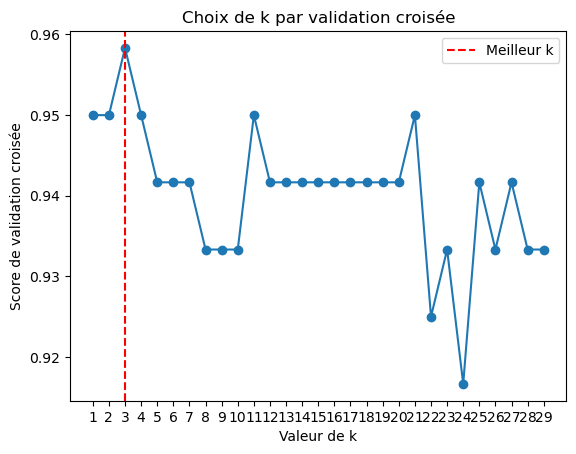

In [6]:
# Tracé du graphique des scores de validation croisée en fonction de k
plt.plot(k_values, cv_scores, '-o')
plt.xlabel('Valeur de k')
plt.ylabel('Score de validation croisée')
plt.title('Choix de k par validation croisée')
plt.xticks(k_values)
plt.axvline(x=best_k, color='r', linestyle='--', label='Meilleur k')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
best_model=grid_search.best_estimator_
# Prédiction sur l'ensemble d'entraînement
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]

# Prédiction sur l'ensemble de test
y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcul de l'exactitude sur les ensembles d'entraînement et de test
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Exactitude sur l'ensemble d'entraînement : {:.2f}%".format(accuracy_train * 100))
print("Exactitude sur l'ensemble de test : {:.2f}%".format(accuracy_test * 100))


Exactitude sur l'ensemble d'entraînement : 95.00%
Exactitude sur l'ensemble de test : 100.00%


# KNN pour la régression

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [10]:
# Charger le jeu de données California Housing
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

In [11]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Créer un modèle KNN pour la régression
knn = KNeighborsRegressor()
# Définir les hyperparamètres à tester avec GridSearchCV
param_grid = {'n_neighbors': [3, 5, 6,7, 9, 10,11,12]}

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres
best_k = grid_search.best_params_['n_neighbors']
best_k

9

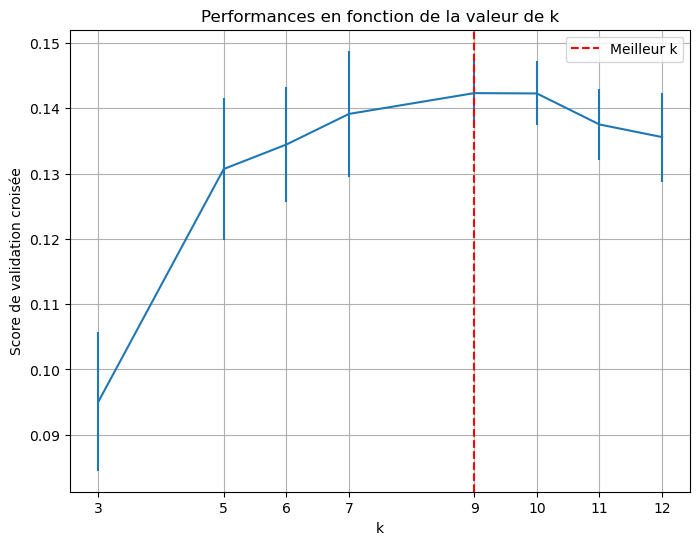

In [13]:
# Obtenir les scores de validation croisée pour chaque valeur de k
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']

# Afficher les performances en fonction de k
plt.figure(figsize=(8, 6))
plt.errorbar(param_grid['n_neighbors'], mean_test_scores, yerr=std_test_scores)
plt.title('Performances en fonction de la valeur de k')
plt.xlabel('k')
plt.ylabel('Score de validation croisée')
plt.xticks(param_grid['n_neighbors'])
plt.axvline(best_k, color='r', linestyle='--', label='Meilleur k')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Entraîner le modèle avec les meilleurs hyperparamètres
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Prédire sur l'ensemble d'entraînement et de test
y_train_pred = knn_best.predict(X_train)
y_test_pred = knn_best.predict(X_test)

# Calculer les performances
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Créer un tableau des performances
performance_table = pd.DataFrame({
    'Performance': ['RMSE', 'R2 Score'],
    'Train': [train_rmse, train_r2],
    'Test': [test_rmse, test_r2]
})

# Afficher le tableau des performances
print(performance_table)

  Performance     Train      Test
0        RMSE  0.940455  1.050358
1    R2 Score  0.338367  0.158086


# Réponses du Quiz jour 72

1. Que signifie 'K' dans K-Nearest Neighbors ?
   - A. Le nombre d'ensembles de données
   - B. Le nombre de voisins les plus proches à considérer
   - C. Le nombre de dimensions de l'ensemble de données
   - D. Le nombre de classes dans l'ensemble de données

   Réponse : B

2. Vrai ou Faux : L'algorithme KNN est uniquement utilisé pour la classification.

   Réponse : Faux

3. Pourquoi est-il important de normaliser les données avant d'appliquer l'algorithme KNN ?
   - A) Pour éviter que certaines caractéristiques n'aient plus de poids simplement en raison de leur échelle.
   - B) Pour rendre l'algorithme plus rapide.
   - C) La normalisation n'est pas nécessaire pour KNN.

   Réponse : A
